# **Bootcamp Ciencia de Datos e Inteligencia Artificial**
# **Módulo 5. Deep Learning**
## **Semana 20. Redes neuronales recurrentes**

Revisa el contenido con especial atención, haz tu copia y comienza a practicar. De esa manera surgirán dudas que podrás resolver con tu *coach* el día de tu clase. 

# Redes neuronales recurrentes

Hasta este momento has visto distintos tipos de redes neuronales. Como seguramente lo has comprendido, estas tratan de simular el funcionamiento del cerebro humano.

Existe otro tipo de red neuronal que imita otro aspecto de la mente: la memoria de corto plazo.

Normalmente, al hablar de memoria entendemos que se refiere a una idea que mantendremos a largo plazo y que es información que requeriremos para utilizar en puntos específicos. La realidad es que existe otro tipo de memoria que usamos un breve instante para ejecutar un acción.

Un ejemplo es cuando recuerdas el número de turno para pasar a la caja de un banco: tendrás presente esta información, pero una vez que te atienden es normal que olvides qué número fue; es un dato que tuvo una función y, una vez cumplida, ya no es necesario retenerlo.

En las redes neuronales sucede algo parecido, pero de manera más breve, sobre todo en datos secuenciales o en series temporales. Un ejemplo sencillo de datos secuenciales son los traductores de idiomas: dependiendo del orden y la intención de las palabras, el algortimo encontrará un sentido a lo que se intenta comunicar y generará los resultados de salida. Esto significa que el sentido de una palabra cambia dependiendo de las palabras que estaban antes, o dicho de otra forma, usan su memoria de palabras antes escritas para hacer su predicción.

Otro ejemplo son los subtítulos automáticos que aparecen en YouTube o en los asistentes virtuales como Alexa de Amazon o Siri de Apple.

Al igual que las redes neuronales que has visto, es necesario tener conjuntos de entrenamiento, sin embargo, lo que diferencia las RNN del CNN es que mientras en la CNN los datos de entradas y salidas son independientes, en la RNN la salida se verá condicionada por los elementos previamente establecidos.


En general, vemos el comportamiento con una serie de datos, conocidos como series de tiempo. Este tipo de información la vemos usualmente en análisis que llevan un ciclo anual, semestral, trimestral u otro.

El comportamiento de las series de tiempo, en muchas ocasiones, tiene una temporalidad muy marcada, esto es, que en ciertos periodos hay picos y valles.

A pesar de lo anterior, no solo los datos con este tipo de comportamiento temporal son exclusivos para el uso de redes recurrentes, ya que se utilizan también para información que tiene un comportamiento más inusual, que puede presentar un cierto grado de incertidumbre o que para el ojo humano presenta un comportamiento fácilmente detectable.

Comprenderás lo anterior con el ejemplo que vamos a llevar a cabo. En esta ocasión, trataremos de hacer una predicción del consumo de voltaje de una subestación eléctrica.

La información puede ser descargada en el siguiente enlace: https://drive.google.com/file/d/14w-sGxt9twNMH6d7BwqKQAH8agMYgS_F/view?usp=share_link

No olvides subir esta información en Google Drive para que puedas utilizarla.

Lo primero que tienes que hacer es importar las paqueterías que te permiten manipular la información. (Recuerda que al iniciar cualquier análisis o modelado, debes tener lo anterior casi de manera automática).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt


El `read_csv` que harás es un poco distinto, ya que es una serie de tiempo y es necesario indicar a **Python** que lo que se ingresa no es solo texto, sino información que representa un día y hora específicos.

Debido a esto, indicarás dos parámetros: el primero es `index_col`, el cual será igual a `'Datetime'`. El otro es `parse_dates`, que deberá estar indicado como `True`. Estos dos parámetros indican que hablamos de fecha.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp Data Science/Copia de DOM_hourly.csv',
                 index_col= 'Datetime',
                 parse_dates= True)
df.head()

,DOM_MW
Datetime,
2005-12-31 01:00:00,9389.0
2005-12-31 02:00:00,9070.0
2005-12-31 03:00:00,9001.0
2005-12-31 04:00:00,9042.0
2005-12-31 05:00:00,9132.0


No olvides revisar cómo está el _data frame_ que has importado. Debido a que es recomendable analizar la información, en este caso lo harás con un gráfico. Para que este tenga mejor aspecto, indica un tamaño de imagen de `(15, 5)`.

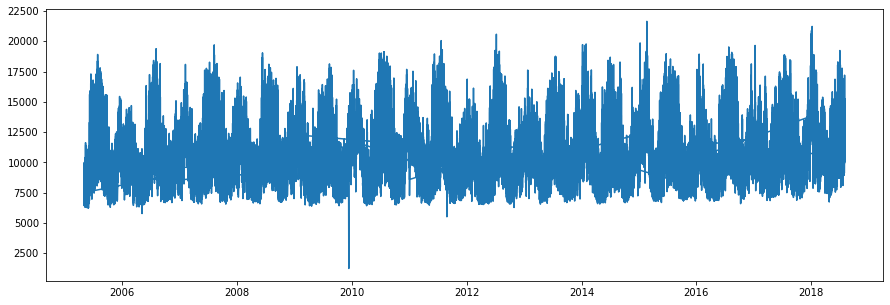

In [ ]:
fig = plt.figure(figsize=(15, 5))
plt.plot(df)
plt.show()

Como seguro recuerdas, normalizar los datos ayuda muchísimo a la red neuronal para tener resultados más certeros.

Ahora usa el `MinMaxScaler` de sklearn: este método coloca valores entre `0` y `1`, siendo `0` el valor mínimo y `1` el máximo, aunque, si lo deseas, puedes indicar que esa escala sea de otros números.

Para poder replicar esta acción te recomendamos el uso de funciones.

In [ ]:
df['DOM_MW'].values.reshape(-1, 1).shape

(116189, 1)

In [ ]:
import sklearn.preprocessing

def normalize_data(df):
    scaler = sklearn.preprocessing.MinMaxScaler()
    df['DOM_MW']=scaler.fit_transform(df['DOM_MW'].values.reshape(-1, 1))
    return df

df_norm = normalize_data(df)
df_norm.shape


(116189, 1)

Como verás, la función crea un objeto llamado `scaler`, que será igual al `MinMaxScaler` que acabas de descargar; después ajusta y transforma los datos con `fit_transform`.

Con la función `.values` se piden los valores que están dentro del _dataframe_, sin embargo, el hacer esto nos dará un vector. En el ejemplo, su `.shape` sería `(116189,)`, pero es necesario que sea una matriz; para ello, usa la función `.reshape(-1,1)`, que lo transforma a `(116189,1)`. De esta forma, ahora sí se pude aplicar el `.fit_transform`.

Ejecuta la función que has creado:

In [ ]:
normalize_data(df)

,DOM_MW
Datetime,
2005-12-31 01:00:00,0.398863
2005-12-31 02:00:00,0.383224
2005-12-31 03:00:00,0.379841
2005-12-31 04:00:00,0.381851
2005-12-31 05:00:00,0.386263
...,...
2018-01-01 20:00:00,0.841504
2018-01-01 21:00:00,0.848809
2018-01-01 22:00:00,0.836062


Ahora viene un concepto un poco difícil de entender, dado que se trata de una serie de tiempo y de las redes neuronales recurrentes.

Como sabrás, en estos dos sistemas para saber «qué sucederá en el futuro» se debe «conocer su pasado», se debe comprender su tendencia, la frecuencia y la temporalidad. Usar una red neuronal que toma un solo valor no permitirá aprender esos detalles, entonces se debe aprenderlos en bloques.

Supongamos que estás haciendo la estimación de compras dentro de un supermercado para un producto específico, y cuentas con los datos de 48 meses. La experiencia que tienes es que el comportamiento es anual, por lo tanto, para saber qué sucede en el mes 49, podrías pensar que debes indicarle a la neurona lo que sucedió 12 meses antes, es decir, desde del mes 37 al 48, para saber qué pasa en el 49. Eso quiere decir que para entrenar este modelo se realiza también en bloques de doce meses, esto es:

- Para saber el mes 13º, las entradas a la red neuronal serán del 1º al 12º.
- Para saber el mes 14º, las entradas a la red neuronal serán del 2º al 13º.
- Para saber el mes 15º, las entradas a la red neuronal serán del 3º al 14º.

Y así sucesivamente hasta cubrir todo el conjunto de entrenamiento.

En este ejemplo hemos dicho que se tomaron doce datos, lo cual permitirá saber la frecuencia y temporalidad, pero no la tendencia. Puede ser que aunque existen ciertos comportamientos fijos, la realidad es que ese producto tiene una tendencia de compra al alza de año tras año, entonces, puedes imaginar que en lugar de tomar doce datos, mejor tomas veinticuatro o treinta y seis.

Regresando a nuestro ejemplo:

La manera más rápida y sencilla de hacer lo anterior es usando las funciones, por lo que te recomendamos fortalecer este tema de **Python**. Esta función se encargará de dos cosas:

1. Hacer los bloques que se estarán ingresando en la red neuronal, los cuales se harán con dos listas: `X_train`, que contendra los $n$ valores previos al dato que queremos conocer, y `y_train`, que es el valor al que se quiere llegar con todos los $X$.

2. Dividir los datos en conjuntos de entrenamiento y de _testing_.

Pon atención a los comentarios que se indican en los numerales (`#`):

In [ ]:
def carga_de_datos(datos, tamano_bloque): #Esta función pedirá los datos y el tamaño de cada bloque.
    X_train = [] #Es necesario hacer una lista vacía, ya que hará más facil agregar datos con .append.
    y_train = [] #Exactamente lo mismo que la línea anterior.
    for i in range(tamano_bloque, len(datos)): #Se hará un bucle que repetirá la longitud de datos menos el tamaño del bloque.
        X_train.append(datos.iloc[i-tamano_bloque : i, 0]) #La cantidad de feature dependerá del tamaño de bloque.
        y_train.append(datos.iloc[i, 0]) #Este solo deberá tener un feature.
    
    #El tamaño del conjunto es de 116189; toma los últimos 6189 para evaluarla, o sea, del valor 110000 hasta el final.
    X_test = X_train[110000:]             
    y_test = y_train[110000:]
    
    #El conjunto de entrenamiento serán los primeros 110000, por eso lo indicamos como 110000.
    X_train = X_train[:110000]           
    y_train = y_train[:110000]
    
    #Los datos creados son datos, pero las redes neuronales necesitan conjuntos, por ello usa np.array().
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    #Las RNN trabajan con tensores, esto es una matriz de tres dimensiones. Para ello usa np.reshape
    X_train = np.reshape(X_train, (110000, tamano_bloque, 1))
    
    X_test = np.reshape(X_test, (X_test.shape[0], tamano_bloque, 1))
    
    #Indica return, ya que deseas tomar los valores para usarlos después.
    return [X_train, y_train, X_test, y_test]


Explicaremos qué es el _reshape_ al final de la función que has creado.

Mientras tanto repasaremos qué es un valor escalar, un vector, una matriz y un tensor.

- Un **escalar** es una cantidad sin dimensión; lo vemos a diario en la temperatura, es decir, es un número que representa un valor, pero que carece de magnitud y dirección. Si lo graficamos, lo veríamos como un punto en una recta.

- Un **vector** es un valor con una dimensión, y puede ser un conjunto de datos. Se suele representar como una línea dentro de una recta.

En **Python** se llaman **_array_**. Son similares a esto:
```python
array([1, 2, 3, 4, 5])
```
En caso de un `.shape`, observarás algo similar a:
```python
(5,)
```

- Una **matriz** es un conjunto de datos bidireccional. Has visto esto mil veces en tablas, en Excel o en imágenes 2D.

En un diagrama es un cuadro que corre por un diagrama de dos dimensiones.

En **Python** lo vemos como **_dataframe_** o como un **_array_** con más corchetes que cumplen una serie de condiciones con respecto a su forma y tamaño:
```python
array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])
```

Al aplicar `.shape` verás esto:
```python
(5, 2)
```

> **NOTA**: Al aplicar `.shape` a un objeto, no es lo mismo `(10,1)` que `(10,)`; el primero es una matriz con un _feature_, mientras que el otro es un vector. Muchas funciones de **Pandas**, **Numpy**, **Sklearn**, **Pyplot** y **Keras** requieren distinguir estas diferencias.

- Un **tensor** es un conjunto de datos con tres o más direcciones, es parecido a una matriz, pero con datos en profundidad.

Para indicarlo en un diagrama se requiere que sea en tres o más direcciones, por lo tanto, dadas las limitaciones que tenemos para ver en más de tres, solemos verlo en muchas tablas con la misma composición. Un buen ejemplo cotidiano son las imágenes que viste la semana anterior al revisar redes neuronales convolucionales.

En **Python** es más díficil representarlos, pero lucen similar a esto:
```python
array([[[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]],

       [[11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20]]])
```
Si usas `shape`, verás:
```python
(2, 2, 5)
```


Ahora, ¿para qué es todo esto?

Las redes neuronales recurrentes necesitan entrada de **tensores**, por ello se usa `np.reshape()`, que te permite hacer estas modificaciones siempre y cuando no haya interferencia en la cantidad de datos a transformar.

Tomemos prestada la línea de código que contiene esta función y expliquémosla:
```python
np.reshape(X_train, (110000, tamano_bloque, 1))
```
- El primer argumento es el conjunto que se transformará.
- El segundo conjunto va en un paréntesis e indica cada una de las dimensiones.
  - La primera es la cantidad de conjuntos que se van a entrenar/testear.
  - La segunda es la cantidad de features; en este caso, corresponde al tamaño del bloque.
  - La tercera no es más que para mantener el conjunto como tensor, similar a lo explicado arriba, ya que no es lo mismo un `.shape` de `(5,)` que de `(5, 1)`. 

Ya está lista la función que permitirá crear conjuntos de entrenamiento y de _testing_, así como separar $X$ de $y$. Ahora es momento de aplicarlo y de paso revisar su `.shape` para ver que sean tensores. 

En el ejemplo que sigue se usará un tamaño de bloque de 20 piezas.

Esta función tardará un momento, pues son miles de datos los que está ajustando.

In [ ]:
tamano_bloque = 20

X_train, y_train, X_test, y_test = carga_de_datos(df, tamano_bloque)

print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)

X_train.shape =  (110000, 20, 1)
y_train.shape =  (110000,)
X_test.shape =  (6169, 20, 1)
y_test.shape =  (6169,)


Los conjuntos de $X$ son tensores (de tres dimensiones), mientras que los conjuntos de $y$ son vectores (de una dimensión). Mira estos ejemplos para ver qué sucedio:

In [ ]:
X_train[19]

array([[0.47519365],
       [0.46450632],
       [0.44656339],
       [0.42837533],
       [0.41160898],
       [0.38204726],
       [0.37033042],
       [0.3720953 ],
       [0.37758604],
       [0.39445044],
       [0.42685557],
       [0.47328169],
       [0.50284342],
       [0.50872635],
       [0.49499951],
       [0.47504657],
       [0.45725071],
       [0.43920973],
       [0.42464948],
       [0.41209923]])

In [ ]:
y_train[19]

0.40837336993822915

Como verás, un valor conjunto de `X_train` está constituido de los veinte valores previos a él. Esto se indica en `tamano_bloque = 20`. Si quisieras usar un tamaño de bloque distinto, verás que cambiará este dato en proporción; en el caso de `y_train`, solo será un valor.

Elaboremos entonces nuestra red neuronal. Como es costumbre, importaremos **Keras** y algunas instrucciones más.

El primer paso es usar `Sequential()`, que nos permitirá apilar las redes neuronales.

Añadiremos después una capa de `SimpleRNN`; aquí unos detalles muy importantes:
- El primer argumento a incluir son las unidades, o sea, la cantidad de redes neuronales. Se recomienda que sea un número alto, pero recuerda hacerlo con moderación, ya que un número muy elevado se traducirá en un mayor uso de los recursos de la memoria de la computadora.
- El segundo argumento es `activation`; por lo general, en RNN se usa la tangente hiperbólica, es decir, `'tanh'`.
- El tercer argumento es `return_sequences`, que indica si la neurona usará esa capacidad de memoría a corto plazo. Si esta capa recurrente **no es la última**, el valor deberá ser `True`; solo aplica `False` en la última capa recurrente. Ten especial atención en este argumento, ya que su valor por defecto es `False`; si tú no indicas lo contrario, puede generar errores.
- El último argumento es el `input_shape`. Este **solo aplica a la primera capa** y debe indicarse cuántos elementos recibirá. Es necesario que este valor lo coloques entre paréntesis, y como verás se ha puesto `,1)` al final, ya que requiere que sea una matriz y no un vector.

Una vez colocada la capa recurrente colocaremos una de `Dropout` para evitar el _overfitting_.

Ahora pondremos varias capas similares para hacerlo más complejo. En el ejemplo serán cuatro conjuntos similares para finalizar una capa densa, conocida como `Dense`, que nos ayuda a emitir la salida de la red neuronal. Aquí indicamos que solo queremos un valor.



In [ ]:
from keras.layers import Dense, Dropout, SimpleRNN, LSTM
from keras.models import Sequential

model = Sequential()

model.add(SimpleRNN(40,activation='tanh', return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.20))

model.add(SimpleRNN(40,activation='tanh', return_sequences=True))
model.add(Dropout(0.20))

model.add(SimpleRNN(40,activation='tanh', return_sequences=True))
model.add(Dropout(0.20))

model.add(SimpleRNN(40,activation='tanh', return_sequences=False))
model.add(Dropout(0.20))

model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20, 40)            1680      
                                                                 
 dropout (Dropout)           (None, 20, 40)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20, 40)            3240      
                                                                 
 dropout_1 (Dropout)         (None, 20, 40)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 20, 40)            3240      
                                                                 
 dropout_2 (Dropout)         (None, 20, 40)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 40)                3

Te recomendamos mucho usar `.summary()` para ver que cómo ha quedado tu red.

Ahora debemos compilar nuestra red indicando un optimizador `'adam'`y en la función de perida pediremos el **M**ean **S**quared **E**rror; si se te hace familiar, es porque se vio en el tema de regresión. Si lo has notado, este es un problema de regresión, no es ni _clustering_, ni clasificación.

Y no olvidemos entrenar nuestra red neuronal. Como sabrás, puedes jugar con esos valores. Nosotros indicaremos 20 épocas y un _batch size_ de mil. 

Recuerda tener cuidado con las cantidades que indiques para no sobrecargar la memoria.

In [ ]:
model.compile(optimizer="adam",loss="MSE")
model.fit(X_train, y_train, epochs=20, batch_size=1000)

Epoch 1/20
110/110 [==============================] - 10s 48ms/step - loss: 0.1393
Epoch 2/20
110/110 [==============================] - 5s 49ms/step - loss: 0.0292
Epoch 3/20
110/110 [==============================] - 5s 49ms/step - loss: 0.0146
Epoch 4/20
110/110 [==============================] - 5s 49ms/step - loss: 0.0091
Epoch 5/20
110/110 [==============================] - 5s 49ms/step - loss: 0.0064
Epoch 6/20
110/110 [==============================] - 7s 61ms/step - loss: 0.0048
Epoch 7/20
110/110 [==============================] - 6s 51ms/step - loss: 0.0039
Epoch 8/20
110/110 [==============================] - 5s 48ms/step - loss: 0.0032
Epoch 9/20
110/110 [==============================] - 5s 49ms/step - loss: 0.0028
Epoch 10/20
110/110 [==============================] - 5s 48ms/step - loss: 0.0024
Epoch 11/20
110/110 [==============================] - 5s 50ms/step - loss: 0.0022
Epoch 12/20
110/110 [==============================] - 5s 49ms/step - loss: 0.0019
Epoch 13/20


Por último, hagamos la predicción del conjunto de _testing_ y midamos con una métrica como $R^2$ y $RMSE $ qué tan certero es:

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

predicciones = model.predict(X_test)

score_r2 = r2_score(y_test, predicciones)
score_rmse = np.sqrt(mean_squared_error(y_test, predicciones))
print("R2 Score: ",score_r2)
print("RMSE Score: ",score_rmse)

193/193 [==============================] - 2s 8ms/step
R2 Score:  0.9612320554627518
RMSE Score:  0.024236344203556397


### Ponte a prueba
- Grafica las predicciones de esta red neuronal y compáralas con el conjunto de _testing_.
- Vuelve a entrenar el modelo pero con una cantidad de capas distintas, de _dropout_, de épocas, _batch size_ e incluso el tamaño del bloque. Juega con los números y observa la eficiencia que obtienes.
- Si te sientes con un plus mayor, haz una red neuronal, pero en lugar de usar `SimpleRNN`, usa `LSTM`: una capa recurrente más avanzada. No te preocupes demasiado, usa los mismos argumentos que `SimpleRNN`, pero ten cuidado con `return_sequences` y con el `input_shape`.

## Mis próximos pasos
Recuerda practicar de manera constante todo lo que has aprendido en este camino de aprendizaje. Anota todas las dudas que surjan y compártelas con tu *coach* el día de la clase. 

Esfuérzate mucho por tener una entrega sobresaliente de tu proyecto. ¡Vas por un excelente camino!